# IRIS FLOWER CLASSIFICATION
## By: Mariam Morenikeji Wasiu

In [1]:
#import libraries
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
df = pd.read_csv("Iris.csv")

In [3]:
# display the first few rows of the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#get descriptive statistic
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [5]:
#Check for missing value
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
# Convert categorical columns (Species) to numeric
# df['Species'].unique()

df['Species'] = df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2,})

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [8]:
#drop id column since its not needed
df = df.drop(columns=["Id"])

In [9]:
# Split data into features X and target y
X = df.drop(columns=["Species"])
y = df["Species"]

In [10]:
# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Train the model using RandomForestClassifier
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# Predict on test data
# y_pred = model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


In [17]:
# train Logistic Regression model
# from sklearn.linear_model import LogisticRegression

# model1 = LogisticRegression(max_iter=1000)
# model1.fit(X_train, y_train)

# make predictions
# y_pred = model1.predict(X_test)

# Evaluate the model accuracy
accuracy1 = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy1 * 100:.2f}%")

Model Accuracy: 100.00%


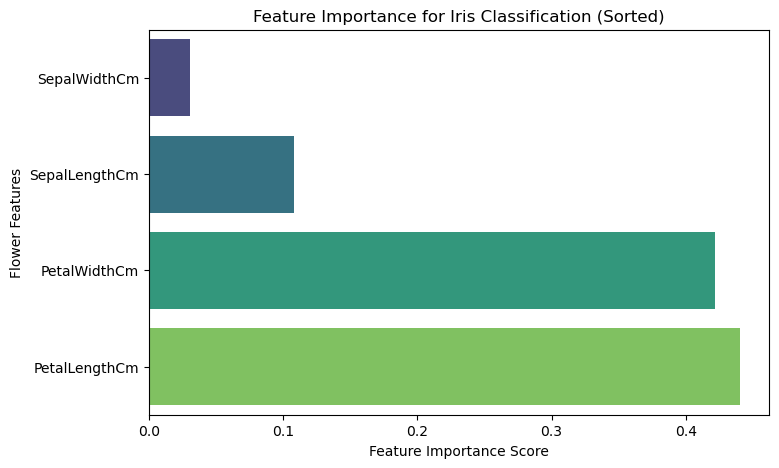

In [18]:
# Feature importance visualization
feature_importances = model.feature_importances_
feature_names = X.columns

# Sort feature importance in ascending order
sorted_indices = np.argsort(feature_importances)
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_importances = feature_importances[sorted_indices]


plt.figure(figsize=(8, 5))
sns.barplot(x=sorted_importances, y=sorted_features, palette="viridis", hue=sorted_features, legend=False)
plt.xlabel("Feature Importance Score")
plt.ylabel("Flower Features")
plt.title("Feature Importance for Iris Classification (Sorted)")
plt.show()

In [19]:
# define a function for predicting iris species
species_mapping = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

def predict_iris(sepal_length, sepal_width, petal_length, petal_width):
    user_data = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]],
                             columns=X.columns)
    prediction = model.predict(user_data)[0]
    return species_mapping[prediction]

In [43]:
# Prediction
print("Prediction of Iris Species:", predict_iris(5.1, 3.5, 1.4, 0.2))

Prediction of Iris Species: Iris-setosa


In [21]:
# Prediction
print("Prediction of Iris Species:", predict_iris(6.5, 2.8, 4.6, 1.5))

Prediction of Iris Species: Iris-versicolor


In [22]:
# Prediction
print("Prediction of Iris Species:", predict_iris(5.8, 2.7, 5.1, 1.9))

Prediction of Iris Species: Iris-virginica


In [23]:
# Prediction
print("Prediction of Iris Species:", predict_iris(4.9, 3.1, 1.5, 0.1))

Prediction of Iris Species: Iris-setosa


In [25]:
# Prediction
print("Prediction of Iris Species:", predict_iris(6.7, 3.0, 6.1, 2.3))

Prediction of Iris Species: Iris-virginica


In [27]:
# Prediction
print("Prediction of Iris Species:", predict_iris(7.7, 3.0, 6.1, 2.3))

Prediction of Iris Species: Iris-virginica
